# Credit Card Fraud Detection
## Introduction
Billions of dollars are lost every year due to fraudulent credit card transactions and data shows that credit card fraud is rising. Therefore there is an urgent need to develop new, and improve current, fraud detection methods.The design of efficient fraud detection algorithms is key to reducing these losses, and more algorithms rely on advanced machine learning techniques to assist fraud investigators. 

The design of fraud detection algorithms is however particularly challenging due to non-stationary distribution of the data, highly imbalanced classes distributions and continuous streams of transactions. At the same time public data are scarcely available for confidentiality issues, leaving unanswered many questions about which is the best strategy to deal with them.

The dataset here contains transactions made by credit cards in September 2013 by european cardholders. This dataset from Kaggle is available here. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, I do not have access to the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are ‘Time’ and ‘Amount’. Feature ‘Time’ contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature ‘Amount’ is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature ‘Class’ is the response variable and it takes value 1 in case of fraud and 0 otherwise.

The objective of the project is to train a machine learning algorithm on the dataset to successfully predict fraudulent transactions.


### Import Libraries

In [18]:
library(dplyr) # for data manipulation
library(stringr) # for data manipulation
library(caret) # for sampling
library(caTools) # for train/test split
library(ggplot2) # for data visualization
library(corrplot) # for correlations
library(Rtsne) # for tsne plotting
library(DMwR) # for smote implementation
library(ROSE)# for ROSE sampling
library(rpart)# for decision tree model
library(Rborist)# for random forest model
library(xgboost) # for xgboost model

In [22]:
#Load data
df =read.csv('C:\\Users\\wikie\\Documents\\Datasets\\creditcard.csv')

### Basic Exploration

In [23]:
head(df)

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,...,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,...,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,...,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,...,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,...,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,...,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


In [24]:
str(df)

'data.frame':	284807 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V

The dataframe has 284807 observations with 31 variables. The variable ‘Class’ indicates whether a transaction is fraudulent(1) or not (0).

In [25]:
summary(df)

      Time              V1                  V2                  V3          
 Min.   :     0   Min.   :-56.40751   Min.   :-72.71573   Min.   :-48.3256  
 1st Qu.: 54202   1st Qu.: -0.92037   1st Qu.: -0.59855   1st Qu.: -0.8904  
 Median : 84692   Median :  0.01811   Median :  0.06549   Median :  0.1799  
 Mean   : 94814   Mean   :  0.00000   Mean   :  0.00000   Mean   :  0.0000  
 3rd Qu.:139321   3rd Qu.:  1.31564   3rd Qu.:  0.80372   3rd Qu.:  1.0272  
 Max.   :172792   Max.   :  2.45493   Max.   : 22.05773   Max.   :  9.3826  
       V4                 V5                   V6                 V7          
 Min.   :-5.68317   Min.   :-113.74331   Min.   :-26.1605   Min.   :-43.5572  
 1st Qu.:-0.84864   1st Qu.:  -0.69160   1st Qu.: -0.7683   1st Qu.: -0.5541  
 Median :-0.01985   Median :  -0.05434   Median : -0.2742   Median :  0.0401  
 Mean   : 0.00000   Mean   :   0.00000   Mean   :  0.0000   Mean   :  0.0000  
 3rd Qu.: 0.74334   3rd Qu.:   0.61193   3rd Qu.:  0.3986   3rd Qu

All the anonymised features seem to have been be normalised with mean 0. We will apply that transformation to the “Amount” column later on to facilitate training ML models.

In [26]:
#Check for missing values
colSums(is.na(df))

Time     V1     V2     V3     V4     V5     V6     V7     V8     V9    V10 
     0      0      0      0      0      0      0      0      0      0      0 
   V11    V12    V13    V14    V15    V16    V17    V18    V19    V20    V21 
     0      0      0      0      0      0      0      0      0      0      0 
   V22    V23    V24    V25    V26    V27    V28 Amount  Class 
     0      0      0      0      0      0      0      0      0

None of the variables have missing values

In [27]:
#Check class imbalance
table(df$Class)


     0      1 
284315    492 

In [28]:
prop.table(table(df$Class))


          0           1 
0.998272514 0.001727486 

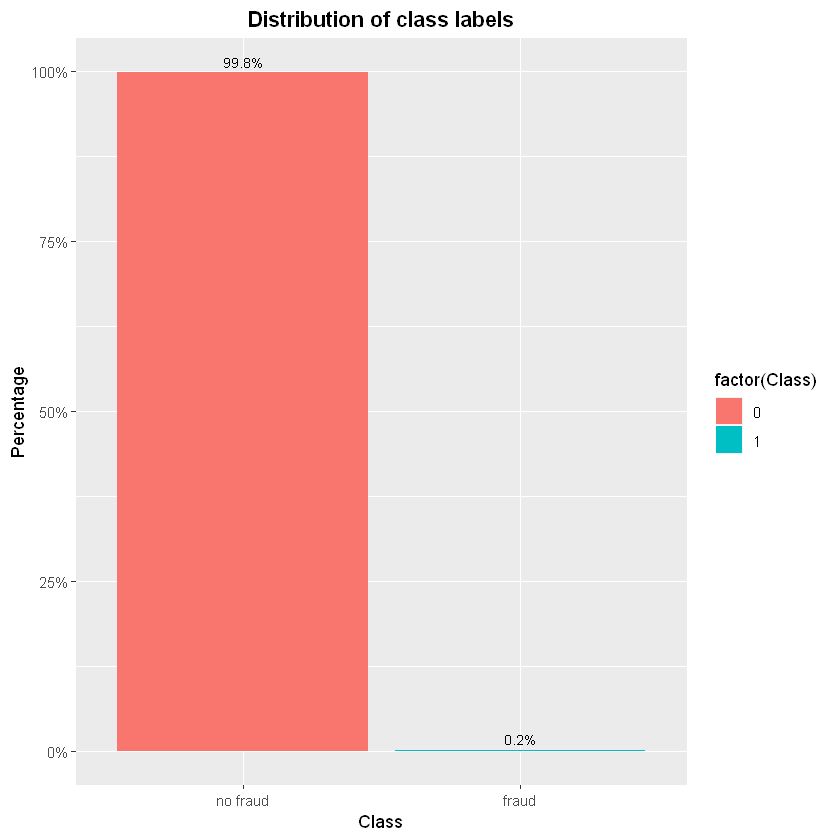

In [29]:
common_theme <- theme(plot.title = element_text(hjust = 0.5, face = "bold"))

ggplot(data = df, aes(x = factor(Class), 
                          y = prop.table(stat(count)), fill = factor(Class),
                          label = scales::percent(prop.table(stat(count))))) +
    geom_bar(position = "dodge") + 
    geom_text(stat = 'count',
              position = position_dodge(.9), 
              vjust = -0.5, 
              size = 3) + 
    scale_x_discrete(labels = c("no fraud", "fraud"))+
    scale_y_continuous(labels = scales::percent)+
    labs(x = 'Class', y = 'Percentage') +
    ggtitle("Distribution of class labels") +
    common_theme

Clearly the dataset is very imbalanced with 99.8% of cases being non-fraudulent transactions. A simple measure like accuracy is not appropriate here as even a classifier which labels all transactions as non-fraudulent will have over 99% accuracy. An appropriate measure of model performance here would be AUC (Area Under the Precision-Recall Curve).

## Data Visualization
### Distribution of variable ‘Time’ by class

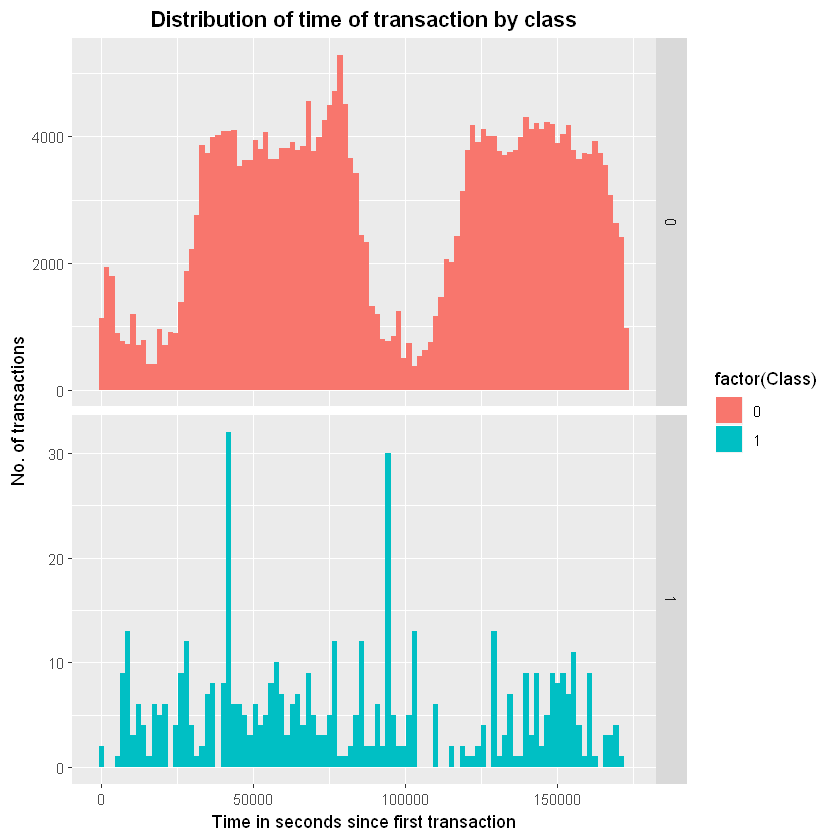

In [30]:
df %>%
  ggplot(aes(x = Time, fill = factor(Class))) + geom_histogram(bins = 100)+
  labs(x = 'Time in seconds since first transaction', y = 'No. of transactions') +
  ggtitle('Distribution of time of transaction by class') +
  facet_grid(Class ~ ., scales = 'free_y') + common_theme

The ‘Time’ feature looks pretty similar across both types of transactions. One could argue that fraudulent transactions are more uniformly distributed, while normal transactions have a cyclical distribution.

#### Distribution of variable ‘Amount’ by class

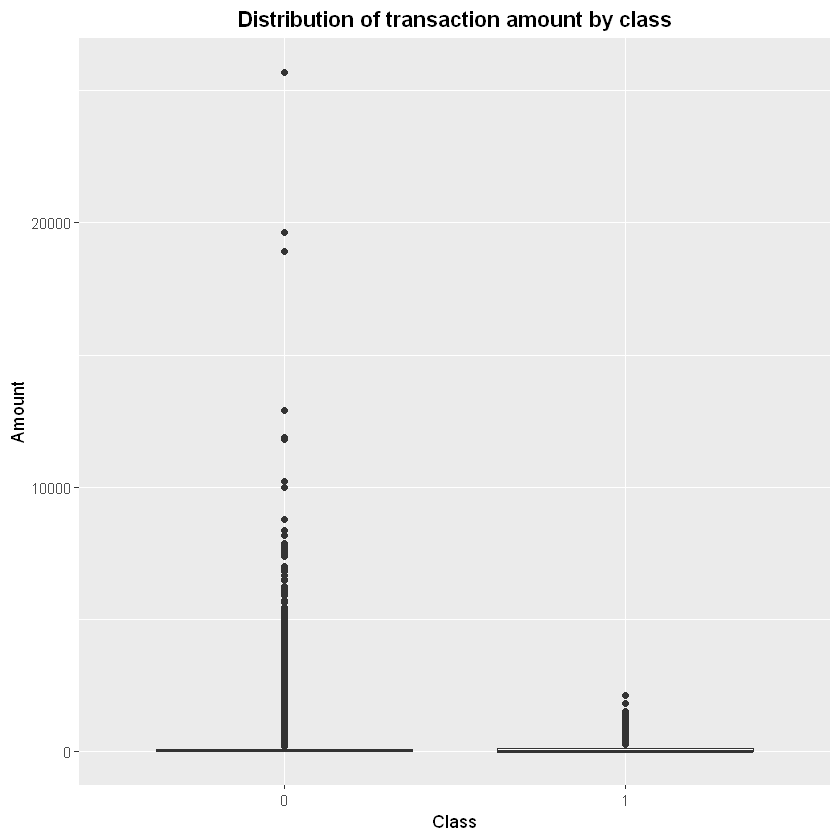

In [31]:
ggplot(df, aes(x = factor(Class), y = Amount)) + geom_boxplot() + 
labs(x = 'Class', y = 'Amount') +
ggtitle("Distribution of transaction amount by class") + common_theme

There is clearly a lot more variability in the transaction values for non-fraudulent transactions.

#### Correlation of anonymised variables and ‘Amount’

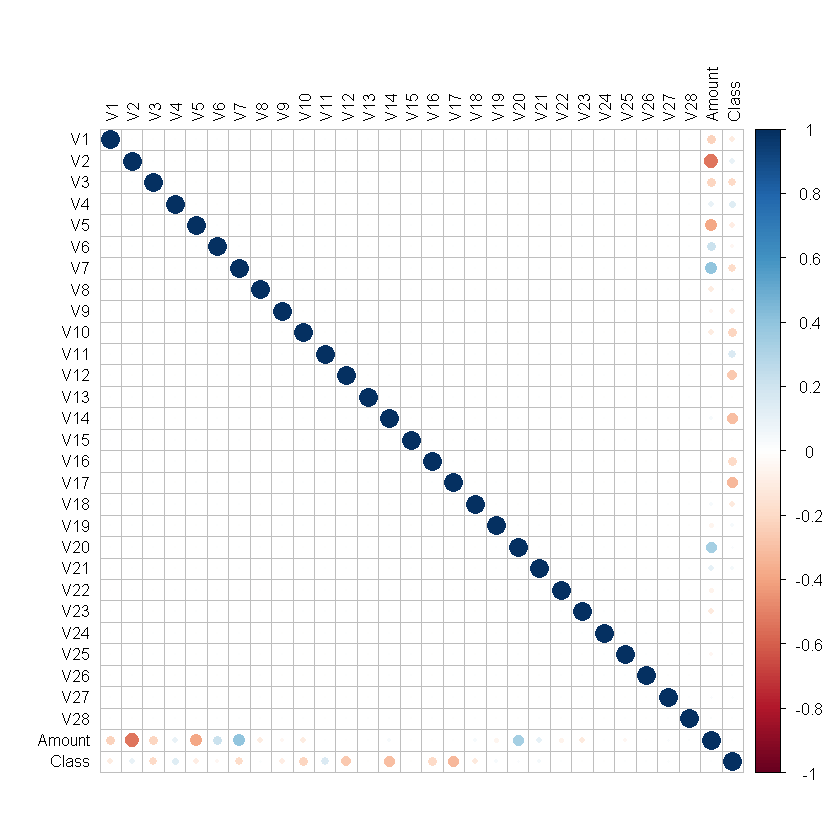

In [32]:
correlations <- cor(df[,-1],method="pearson")
corrplot(correlations, number.cex = .9, method = "circle", type = "full", tl.cex=0.8,tl.col = "black")

We observe that most of the data features are not correlated. This is because before publishing, most of the features were presented to a Principal Component Analysis (PCA) algorithm. The features V1 to V28 are most probably the Principal Components resulted after propagating the real features through PCA. We do not know if the numbering of the features reflects the importance of the Principal Components.

#### Visualization of transactions using t-SNE

To try to understand the data better, we will try visualizing the data using t-Distributed Stochastic Neighbour Embedding, a technique to reduce dimensionality using Barnes-Hut approximations.

To train the model, perplexity was set to 20.

The visualisation should give us a hint as to whether there exist any “discoverable” patterns in the data which the model could learn. If there is no obvious structure in the data, it is more likely that the model will perform poorly.

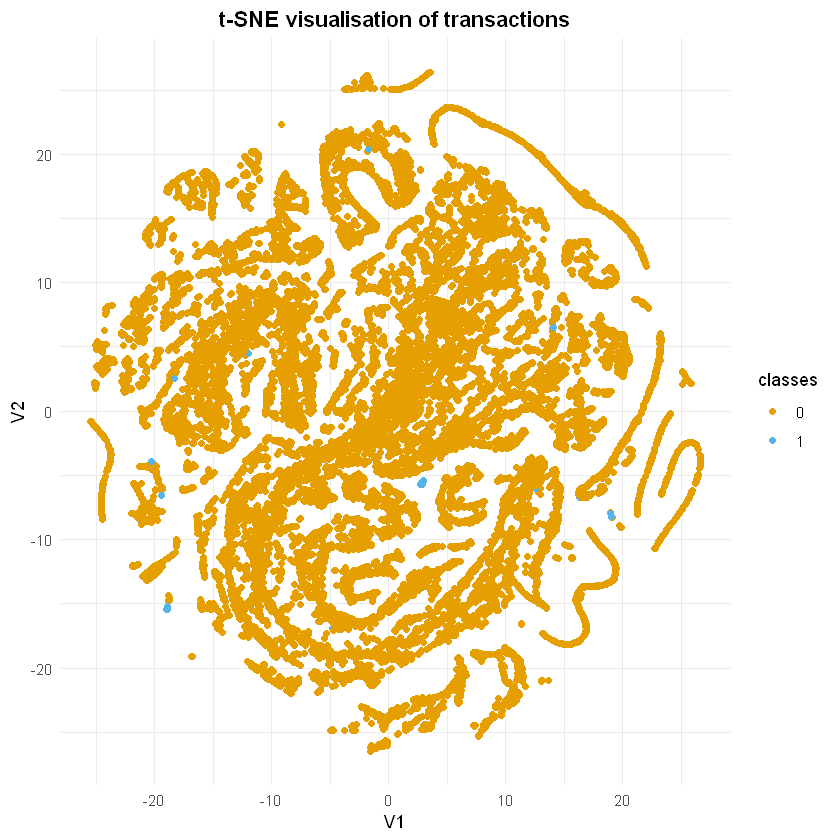

In [33]:
# Use 10% of data to compute t-SNE
tsne_subset <- 1:as.integer(0.1*nrow(df))
tsne <- Rtsne(df[tsne_subset,-c(1, 31)], perplexity = 20, theta = 0.5, pca = F, verbose = F, max_iter = 500, check_duplicates = F)

classes <- as.factor(df$Class[tsne_subset])
tsne_mat <- as.data.frame(tsne$Y)
ggplot(tsne_mat, aes(x = V1, y = V2)) + geom_point(aes(color = classes)) + theme_minimal() + common_theme + ggtitle("t-SNE visualisation of transactions") + scale_color_manual(values = c("#E69F00", "#56B4E9"))

There appears to be a separation between the two classes as most fraudulent transactions seem to lie near the edge of the blob of data.

## Modeling Approach
Standard machine learning algorithms struggle with accuracy on imbalanced data for the following reasons:

1. ML algorithms struggle with accuracy because of the unequal distribution in dependent variable.This causes the performance of existing classifiers to get biased towards majority class.
2. The algorithms are accuracy driven i.e. they aim to minimize the overall error to which the minority class contributes very little.
3. ML algorithms assume that the data set has balanced class distributions.
4. They also assume that errors obtained from different classes have same cost

The methods to deal with this problem are widely known as ‘Sampling Methods’. Generally, these methods aim to modify an imbalanced data into balanced distribution using some mechanism. The modification occurs by altering the size of original data set and provide the same proportion of balance.

These methods have acquired higher importance after many researches have proved that balanced data results in improved overall classification performance compared to an imbalanced data set. Hence, it’s important to learn them.

Below are the methods used here to treat the imbalanced dataset:

- Undersampling
- Oversampling
- Synthetic Data Generation

#### Undersampling

This method reduces the number of observations from majority class to make the data set balanced. This method is best to use when the data set is huge and reducing the number of training samples helps to improve run time and storage troubles.

Undersampling methods are of 2 types: Random and Informative.

Random undersampling method randomly chooses observations from majority class which are eliminated until the data set gets balanced. Informative undersampling follows a pre-specified selection criterion to remove the observations from majority class.

A possible problem with this method is that removing observations may cause the training data to lose important information pertaining to majority class.

#### Oversampling

This method works with minority class. It replicates the observations from minority class to balance the data. It is also known as upsampling. Similar to undersampling, this method also can be divided into two types: Random Oversampling and Informative Oversampling.

Random oversampling balances the data by randomly oversampling the minority class. Informative oversampling uses a pre-specified criterion and synthetically generates minority class observations.

An advantage of using this method is that it leads to no information loss. The disadvantage of using this method is that, since oversampling simply adds replicated observations in original data set, it ends up adding multiple observations of several types, thus leading to overfitting.

#### Synthetic Data Generation (SMOTE and ROSE)

In simple words, instead of replicating and adding the observations from the minority class, it overcome imbalances by generates artificial data. It is also a type of oversampling technique.

In regards to synthetic data generation, synthetic minority oversampling technique (SMOTE) is a powerful and widely used method. SMOTE algorithm draws artificial samples by choosing points that lie on the line connecting the rare observation to one of its nearest neighbors in the feature space. ROSE (random over-sampling examples) uses smoothed bootstrapping to draw artificial samples from the feature space neighbourhood around the minority class.

#### It is important to note that sampling techniques should only be applied to the training set and not the testing set.

Our modeling approach will involve training a single classifier on the train set with class imbalance suitably altered using each of the techniques above. Depending on which technique yields the best roc-auc score on a holdout test set. we will build subsequent models using that chosen technique.

## Data Preparation
‘Time’ feature does not indicate the actual time of the transaction and is more of listing the data in chronological order. Based on the data visualization above we assume that ‘Time’ feature has little or no significance in correctly classifying a fraud transaction and hence eliminate this column from further analysis.

In [34]:
#Remove 'Time' variable
df <- df[,-1]

In [35]:
#Change 'Class' variable to factor
df$Class <- as.factor(df$Class)
levels(df$Class) <- c("Not_Fraud", "Fraud")

#Scale numeric variables

df[,-30] <- scale(df[,-30])

head(df)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
-0.6942411,-0.04407485,1.6727706,0.9733638,-0.245116153,0.34706734,0.1936786,0.08263713,0.3311272,0.08338540,...,-0.02492332,0.382853766,-0.17691102,0.1105067,0.2465850,-0.3921697,0.33089104,-0.06378104,0.24496383,Not_Fraud
0.6084953,0.16117564,0.1097969,0.3165224,0.043483276,-0.06181986,-0.0637001,0.07125336,-0.2324938,-0.15334936,...,-0.30737626,-0.880075209,0.16220090,-0.5611296,0.3206933,0.2610690,-0.02225564,0.04460744,-0.34247394,Not_Fraud
-0.6934992,-0.81157640,1.1694664,0.2682308,-0.364571146,1.35145121,0.6397745,0.20737237,-1.3786729,0.19069928,...,0.33763110,1.063356404,1.45631719,-1.1380901,-0.6285356,-0.2884462,-0.13713661,-0.18102051,1.16068389,Not_Fraud
-0.4933240,-0.11216923,1.1825144,-0.6097256,-0.007468867,0.93614819,0.1920703,0.31601704,-1.2625010,-0.05046786,...,-0.14744304,0.007266895,-0.30477601,-1.9410237,1.2419015,-0.4602165,0.15539593,0.18618826,0.14053401,Not_Fraud
-0.5913287,0.53154012,1.0214099,0.2846549,-0.295014918,0.07199846,0.4793014,-0.22650983,0.7443250,0.69162382,...,-0.01283920,1.100009340,-0.22012301,0.2332497,-0.3952009,1.0416095,0.54361884,0.65181477,-0.07340321,Not_Fraud
-0.2174742,0.58167387,0.7525841,-0.1188331,0.305008424,-0.02231344,0.3849353,0.21795429,-0.5176177,-0.34110050,...,-0.28352172,-0.771425648,-0.04227277,-0.6132723,-0.4465828,0.2196368,0.62889938,0.24563577,-0.33855582,Not_Fraud


Split data into train and test sets

In [36]:
set.seed(123)
split <- sample.split(df$Class, SplitRatio = 0.7)
train <-  subset(df, split == TRUE)
test <- subset(df, split == FALSE)

## Choosing sampling technique
Let us create different versions of the training set as per sampling technique

In [37]:
table(train$Class)


Not_Fraud     Fraud 
   199020       344 

In [38]:
set.seed(9560)
down_train <- downSample(x = train[, -ncol(train)],
                         y = train$Class)
table(down_train$Class)  


Not_Fraud     Fraud 
      344       344 

In [39]:
set.seed(9560)
up_train <- upSample(x = train[, -ncol(train)],
                         y = train$Class)
table(up_train$Class)  


Not_Fraud     Fraud 
   199020    199020 

In [40]:
set.seed(9560)
smote_train <- SMOTE(Class ~ ., data  = train)

table(smote_train$Class)  


Not_Fraud     Fraud 
     1376      1032 

In [41]:
set.seed(9560)
rose_train <- ROSE(Class ~ ., data  = train)$data 

table(rose_train$Class) 


Not_Fraud     Fraud 
    99844     99520 

#### We choose CART(classification and regression tree) as first model.

Before we start using sampling let us first look at how CART performs with imbalanced data. We use the function roc.curve available in the ROSE package to gauge model performance on the test set.

Area under the curve (AUC): 0.912

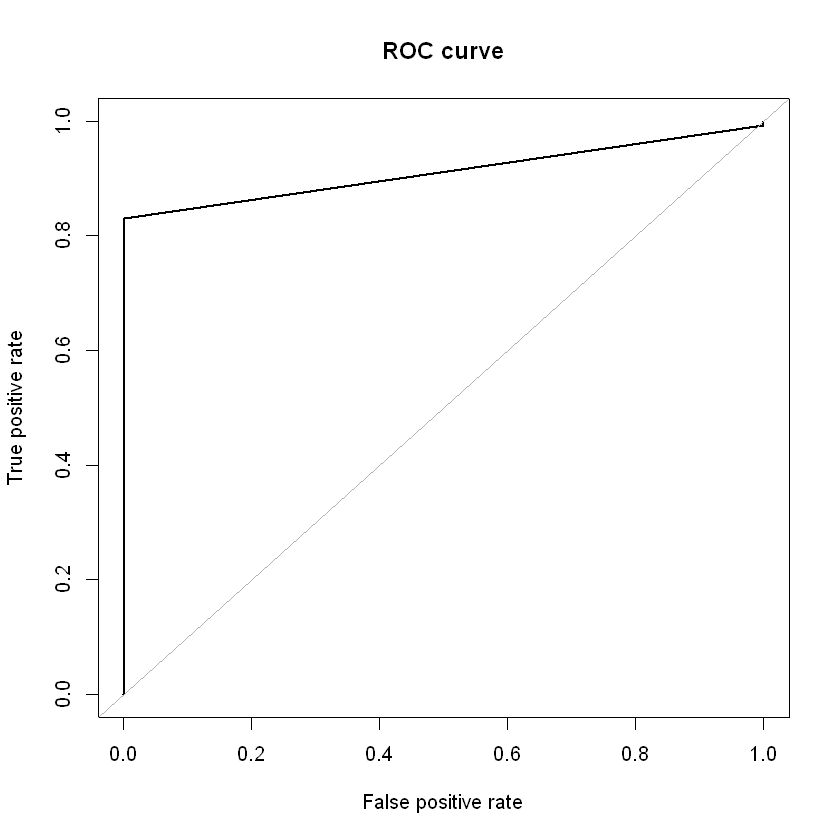

In [42]:
#CART Model Performance on imbalanced data
set.seed(5627)

orig_fit <- rpart(Class ~ ., data = train)

#Evaluate model performance on test set
pred_orig <- predict(orig_fit, newdata = test, method = "class")

roc.curve(test$Class, pred_orig[,2], plotit = TRUE)

We evaluate the model performance on test data by finding the roc auc score

We see that the auc score on the original dataset is 0.912 . We will now apply various sampling techniques to the data and see the performance on the test set.

In [44]:
set.seed(5627)
# Build down-sampled model


down_fit <- rpart(Class ~ ., data = down_train)


set.seed(5627)
# Build up-sampled model


up_fit <- rpart(Class ~ ., data = up_train)


set.seed(5627)
# Build smote model


smote_fit <- rpart(Class ~ ., data = smote_train)

set.seed(5627)
# Build rose model
rose_fit <- rpart(Class ~ ., data = rose_train)

In [45]:
pred_down <- predict(down_fit, newdata = test)

print('Fitting downsampled model to test data')

[1] "Fitting downsampled model to test data"


In [47]:
roc.curve(test$Class, pred_down[,2], plotit = FALSE)

Area under the curve (AUC): 0.942

In [49]:
pred_up <- predict(up_fit, newdata = test)

print('Fitting upsampled model to test data')

[1] "Fitting upsampled model to test data"


In [51]:
roc.curve(test$Class, pred_up[,2], plotit = FALSE)

Area under the curve (AUC): 0.943

In [53]:
pred_smote <- predict(smote_fit, newdata = test)

print('Fitting smote model to test data')

[1] "Fitting smote model to test data"


In [54]:
roc.curve(test$Class, pred_smote[,2], plotit = FALSE)

Area under the curve (AUC): 0.934

In [55]:
pred_rose <- predict(rose_fit, newdata = test)

print('Fitting rose model to test data')

[1] "Fitting rose model to test data"


In [56]:
roc.curve(test$Class, pred_rose[,2], plotit = FALSE)

Area under the curve (AUC): 0.942

We see that all the sampling techniques have yielded better auc scores than the simple imbalanced dataset. We will test different models now using the up sampling technique as that has given the highest auc score.

## Results
Specifically the following models will be tested:

- logistic regression (GLM)
- random forest (RF)
- xgboost (XGB) 1

## GLM Fit

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Area under the curve (AUC): 0.971

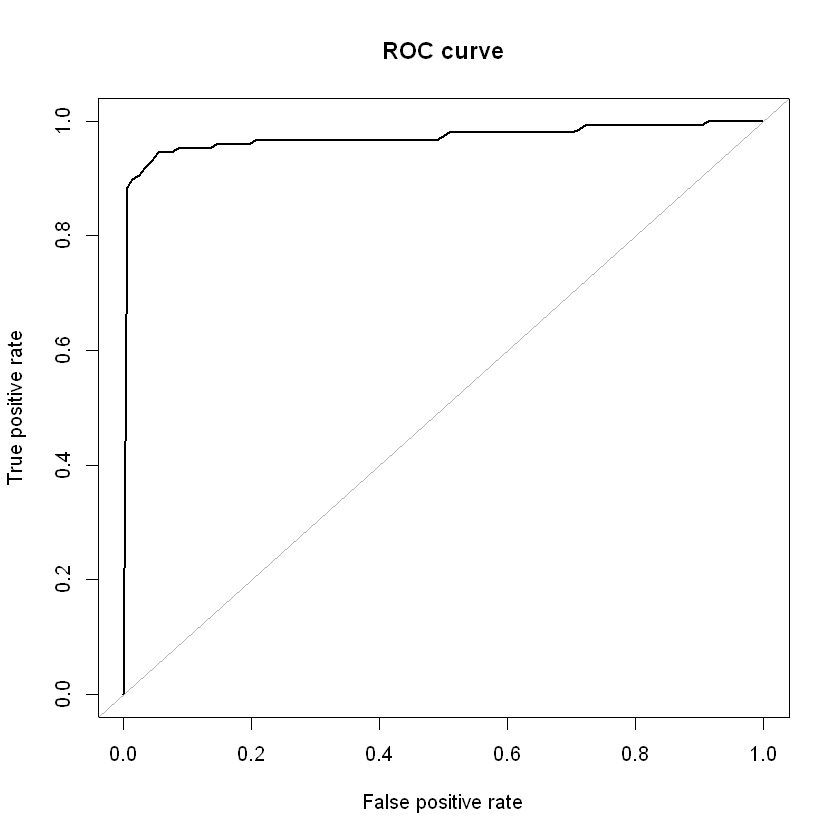

In [59]:
glm_fit <- glm(Class ~ ., data = up_train, family = 'binomial')

pred_glm <- predict(glm_fit, newdata = test, type = 'response')

roc.curve(test$Class, pred_glm, plotit = TRUE)

## RF Fit (we use the Rborist package)

Area under the curve (AUC): 0.973

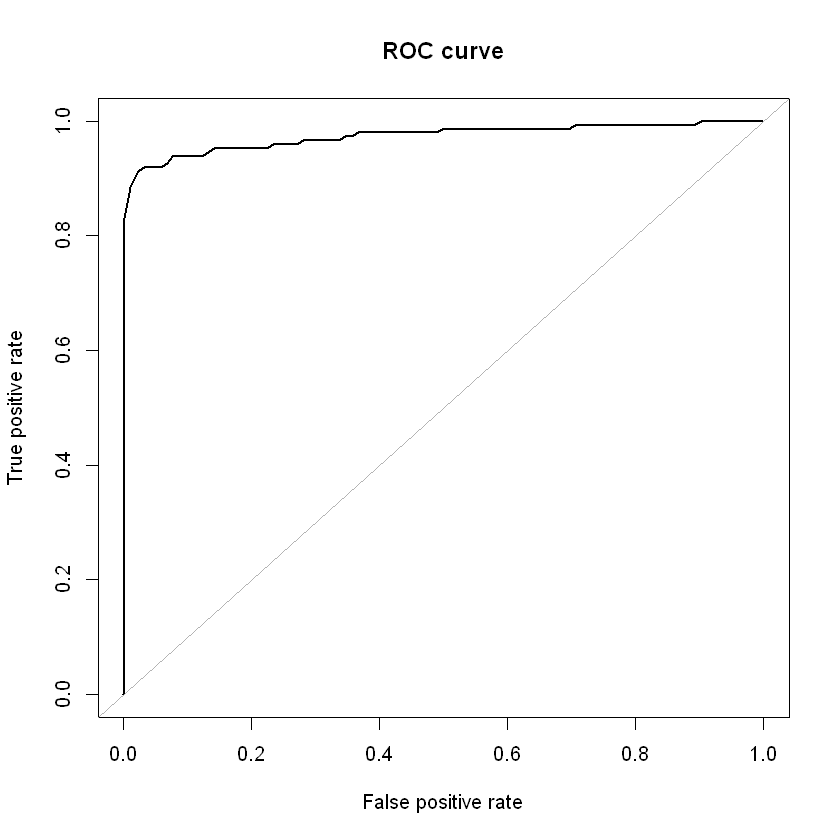

In [61]:
x = up_train[, -30]
y = up_train[,30]

rf_fit <- Rborist(x, y, ntree = 1000, minNode = 20, maxLeaf = 13)


rf_pred <- predict(rf_fit, test[,-30], ctgCensus = "prob")
prob <- rf_pred$prob

roc.curve(test$Class, prob[,2], plotit = TRUE)

## XGB Fit

In [62]:
#COnvert class labels from factor to numeric

labels <- up_train$Class

y <- recode(labels, 'Not_Fraud' = 0, "Fraud" = 1)

In [63]:
xgb <- xgboost(data = data.matrix(up_train[,-30]), 
 label = y,
 eta = 0.1,
 gamma = 0.1,
 max_depth = 10, 
 nrounds = 300, 
 objective = "binary:logistic",
 colsample_bytree = 0.6,
 verbose = 0,
 nthread = 7,
 seed = 42
)

Warning message in xgb.train(params, dtrain, nrounds, watchlist, verbose = verbose, :
"xgb.train: `seed` is ignored in R package.  Use `set.seed()` instead."

Area under the curve (AUC): 0.977

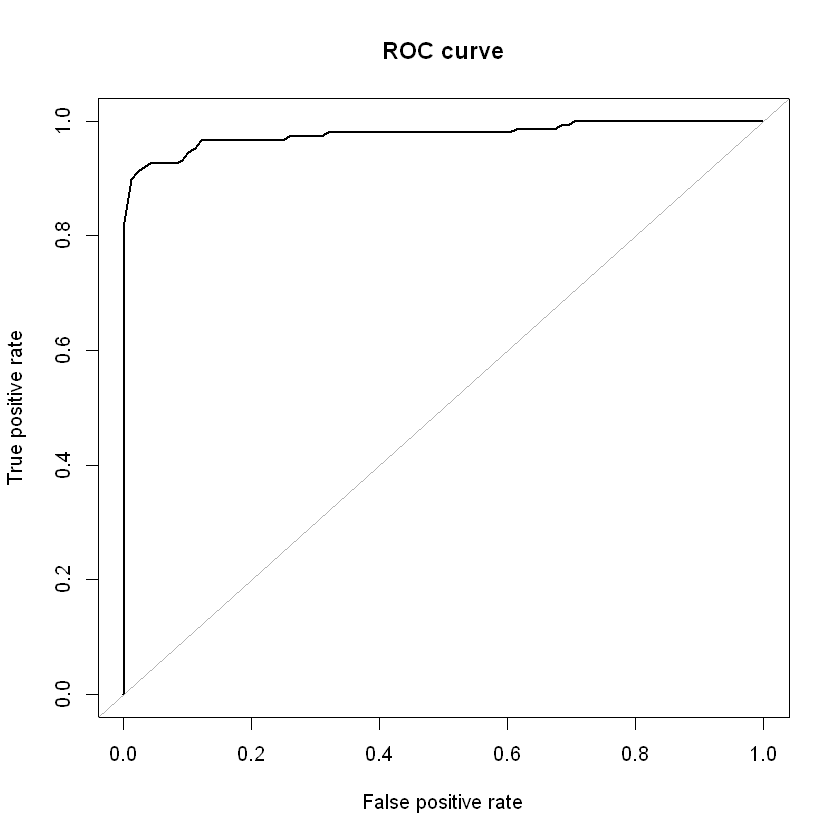

In [64]:
xgb_pred <- predict(xgb, data.matrix(test[,-30]))

roc.curve(test$Class, xgb_pred, plotit = TRUE)

We can also take a look at the important features here.

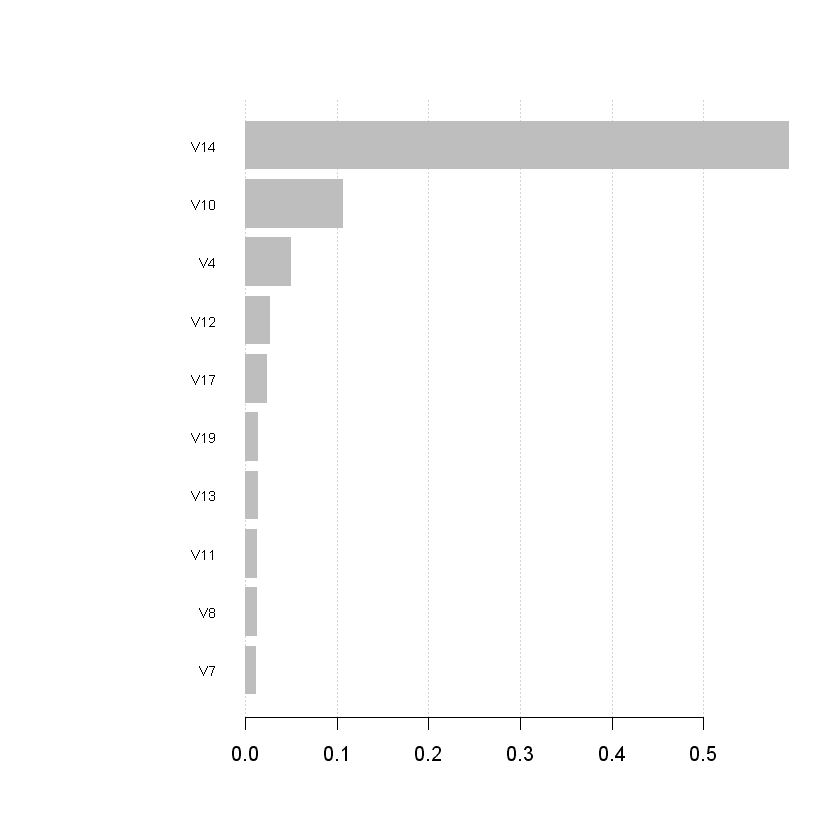

In [65]:
names <- dimnames(data.matrix(up_train[,-30]))[[2]]

# Compute feature importance matrix
importance_matrix <- xgb.importance(names, model = xgb)
# Nice graph
xgb.plot.importance(importance_matrix[1:10,])

With an auc score of 0.977 the XGBOOST model has performed the best though both the random forest and logistic regression models have shown reasonable performance.

## Conclusion
In this project I have tried to show different methods of dealing with unbalanced datasets like the fraud credit card transaction dataset where the instances of fraudulent cases is few compared to the instances of normal transactions. I have argued why accuracy is not an appropriate measure of model performance here and used the metric AREA UNDER ROC CURVE to evaluate how different methods of oversampling or undersampling the response variable can lead to better model training. I concluded that the oversampling technique works best on the dataset and achieved significant improvement in model performance over the imabalanced data. The best score of 0.977 was achieved using an XGBOOST model though both random forest and logistic regression models performed well too. It is likely that by further tuning the XGBOOST model paramteres I can achieve even better performance. However this exercise has demonstrated the importance of sampling ineffectively modelling and predicting data with an imbalanced dataset.